/var/folders/3x/sg00y37n2rg22srjzxtsqjqw0000gn/T/ipykernel_33825/588706618.py:30: DeprecationWarning: V1 Primitives are deprecated as of qiskit-machine-learning 0.8.0 and will be removed no sooner than 4 months after the release date. Use V2 primitives for continued compatibility and support.
  qnn = EstimatorQNN(circuit=qc, input_params=[param_x], weight_params=[param_y])


Loss: 1.1457439661026
Loss: 1.0794373750686646
Loss: 1.0523648262023926
Loss: 1.0319454669952393
Loss: 1.0160505771636963
Loss: 1.0035836696624756
Loss: 0.9937512278556824
Loss: 0.9859626889228821
Loss: 0.9797719717025757
Loss: 0.9748371243476868
Loss: 0.9708941578865051
Loss: 0.9677377939224243
Loss: 0.9652067422866821
Loss: 0.9631747007369995
Loss: 0.9615413546562195
Loss: 0.9602270126342773
Loss: 0.9591686129570007
Loss: 0.9583157300949097
Loss: 0.9576281309127808
Loss: 0.9570732116699219
Loss: 0.9566253423690796
Loss: 0.9562637209892273
Loss: 0.9559717178344727
Loss: 0.9557355642318726
Loss: 0.9555448293685913
Loss: 0.9553905725479126
Loss: 0.9552658796310425
Loss: 0.9551650881767273
Loss: 0.9550834894180298
Loss: 0.9550174474716187
Loss: 0.9549640417098999
Loss: 0.9549208879470825
Loss: 0.9548857808113098
Loss: 0.9548575282096863
Loss: 0.9548346400260925
Loss: 0.9548160433769226
Loss: 0.954801082611084
Loss: 0.9547890424728394
Loss: 0.9547791481018066
Loss: 0.9547710418701172
Loss

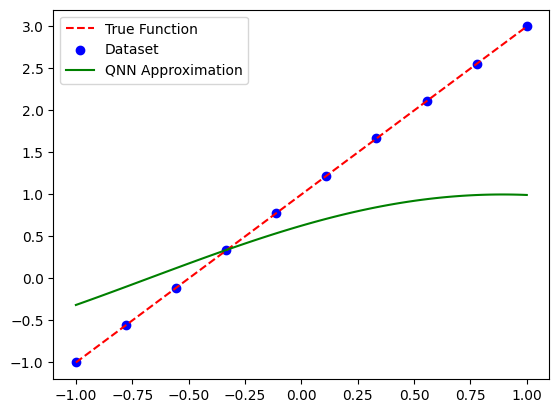

In [1]:
import numpy as np
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit_machine_learning.neural_networks import EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector

# Step 1: Generate Simple Dataset (Linear Function)
x_values = np.linspace(-1, 1, 10)
y_values = 2 * x_values + 1  # Linear function y = 2x + 1

# Step 2: Create a Simple QNN
param_x = Parameter("x")  # Input parameter
param_y = Parameter("y")  # Trainable weight

# Feature Map: Uses x as input
feature_map = QuantumCircuit(1)
feature_map.ry(param_x, 0)

# Ansatz: Trainable weight parameter
ansatz = QuantumCircuit(1)
ansatz.ry(param_y, 0)

# Combine circuits
qc = feature_map.compose(ansatz)

# Create QNN using EstimatorQNN
qnn = EstimatorQNN(circuit=qc, input_params=[param_x], weight_params=[param_y])

# Step 3: Connect QNN to PyTorch
model = TorchConnector(qnn)
optimizer = optim.LBFGS(model.parameters(), lr=0.1)
loss_fn = torch.nn.MSELoss()

# Convert dataset to PyTorch tensors
x_tensor = torch.tensor(x_values, dtype=torch.float32).reshape(-1, 1)
y_tensor = torch.tensor(y_values, dtype=torch.float32).reshape(-1, 1)

# Step 4: Train the QNN
def closure():
    optimizer.zero_grad()
    y_pred = model(x_tensor)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    print(f"Loss: {loss.item()}")
    return loss

for _ in range(50):  # Train for fewer iterations
    optimizer.step(closure)

# Step 5: Plot Results
x_test = np.linspace(-1, 1, 100)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).reshape(-1, 1)
y_pred = model(x_test_tensor).detach().numpy()

plt.plot(x_test, 2 * x_test + 1, 'r--', label="True Function")
plt.scatter(x_values, y_values, color='blue', label="Dataset")
plt.plot(x_test, y_pred, 'g-', label="QNN Approximation")
plt.legend()
plt.show()